In [1]:
from joblib import load
from pandas import set_option, read_csv
from numpy import quantile, unique, sort, argsort, array
from os.path import basename

set_option('display.max_columns', None)
set_option('display.max_rows', 200)

from lqid import img2matrix, quickshow

In [2]:
model_multi = load("model_random_forest_multi.joblib")
df_public = read_csv("df_public.csv")
array_number = array([int(basename(x).split("_")[0]) for x in df_public["path"]])
df_public = df_public.loc[array_number > 250, :]

In [3]:
predictions = model_multi.predict_proba(df_public.loc[:, ~df_public.columns.isin(("target", "path", "dataset"))])

In [4]:
argsort_preds = argsort(predictions, axis=1)
sort_preds = sort(predictions, axis=1)

df_public["pred_idx_top1"] = argsort_preds[:, -1]
df_public["pred_idx_top2"] = argsort_preds[:, -2]
df_public["pred_idx_top3"] = argsort_preds[:, -3]
df_public["pred_proba_top1"] = sort_preds[:, -1]
df_public["pred_proba_top2"] = sort_preds[:, -2]
df_public["pred_proba_top3"] = sort_preds[:, -3]

In [5]:
list_target = ['sharp', 'defocused_blurred', 'motion_blurred', 'blur', 'band', 'noise', 'exposure', 'glare', 'dark', 'constant']

df_public["pred_top1"] = [list_target[idx] for idx in df_public["pred_idx_top1"]]
df_public["pred_top2"] = [list_target[idx] for idx in df_public["pred_idx_top2"]]
df_public["pred_top3"] = [list_target[idx] for idx in df_public["pred_idx_top3"]]

df_public["correct"] = "WRONG"
df_public.loc[(df_public["target"] == df_public["pred_top1"]), ["correct"]] = "CORRECT"

In [6]:
#df_public.loc[:, ["path", "target", "pred_top1", "pred_proba_top1", "pred_top2", "pred_proba_top2", "pred_top3", "pred_proba_top3", ]]

dataset_synthetic/blur/306_XIAOMI-REDMI-5-PLUS_S.jpg_blur.jpeg CORRECT
blur 0.926 defocused_blurred 0.032 band 0.018


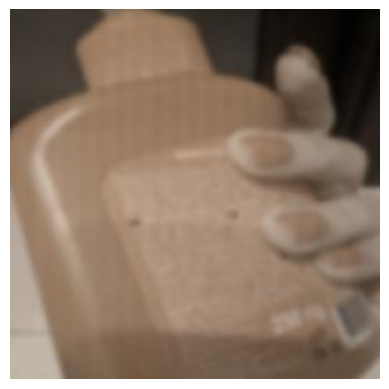


dataset_synthetic/glare/286_SONY-NEX-5T_S.JPG_glare.jpeg CORRECT
glare 0.732 dark 0.216 blur 0.052


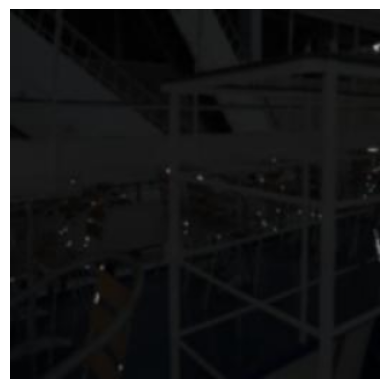


dataset_synthetic/constant/273_NIKON-D3400-18-55MM_S.JPG_constant.jpeg CORRECT
constant 1.0 dark 0.0 glare 0.0


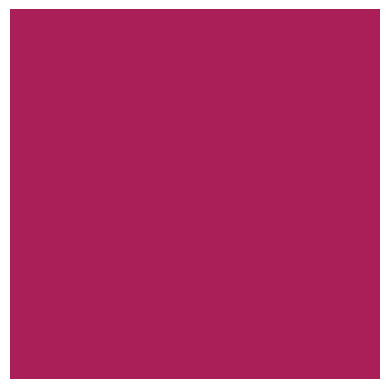


dataset_synthetic/blur/268_NIKON-D3400-18-55MM_S.JPG_blur.jpeg CORRECT
blur 0.734 glare 0.166 defocused_blurred 0.044


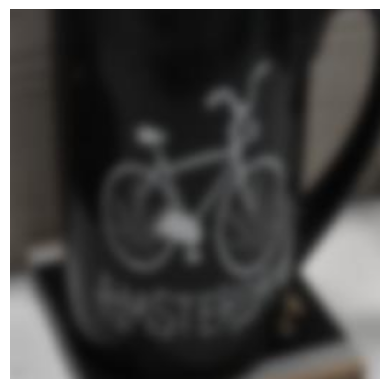

In [7]:
for _, row in df_public.loc[df_public["correct"] == "CORRECT"].sample(4).iterrows():
    print(row["path"], row["correct"])
    print(row["pred_top1"], row["pred_proba_top1"], row["pred_top2"], row["pred_proba_top2"], row["pred_top3"], row["pred_proba_top3"] )
    quickshow(img2matrix(row["path"])["rgb"])
    print()

dataset_synthetic/band/274_NIKON-D3400-18-55MM_S.JPG_band.jpeg WRONG
defocused_blurred 0.384 band 0.222 motion_blurred 0.19


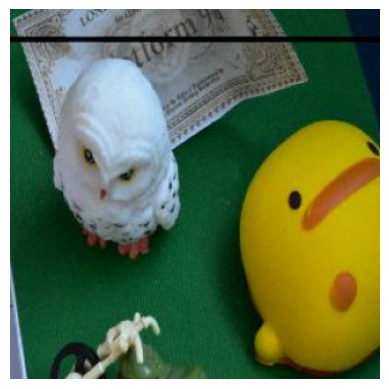


dataset_dms/defocused_blurred/333_HONOR-7X_F.jpg WRONG
glare 0.504 band 0.254 motion_blurred 0.098


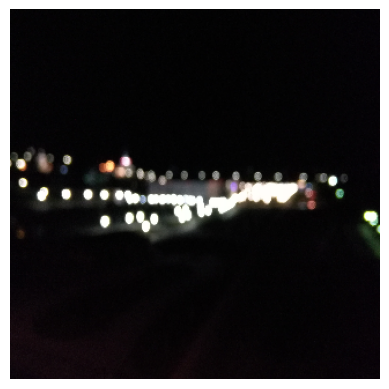


dataset_synthetic/band/295_HONOR-7X_S.jpg_band.jpeg WRONG
sharp 0.734 band 0.214 motion_blurred 0.044


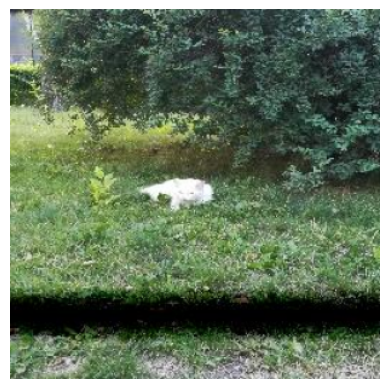


dataset_dms/motion_blurred/255_XIAOMI-REDMI-7_M.jpg WRONG
defocused_blurred 0.506 motion_blurred 0.33 blur 0.134


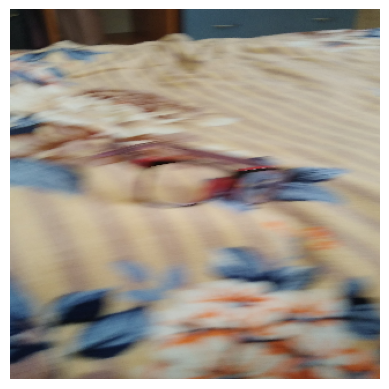

In [8]:
for _, row in df_public.loc[df_public["correct"] == "WRONG"].sample(4).iterrows():
    print(row["path"], row["correct"])
    print(row["pred_top1"], row["pred_proba_top1"], row["pred_top2"], row["pred_proba_top2"], row["pred_top3"], row["pred_proba_top3"] )
    quickshow(img2matrix(row["path"])["rgb"])
    print()